# Grafos sequenciais

A ideia aqui é criar dois nós sequenciais.
Para esta tarefa iremos pedir para uma LLM discutir sobre algum tópico e 
o segundo nó irá verificar qual argumento venceu

# Criando estrutura do grafo

In [1]:
from langchain.chat_models import init_chat_model
from typing import TypedDict
from langgraph.graph import StateGraph


class State(TypedDict):
    model: init_chat_model
    response_first_node: str
    response_second_node: str
    topic: str

graph_builder = StateGraph(State)

# Criando nós

### Primeiro nó

In [2]:
PRIMEIRO_NODE_PROMPT = """
Você irá receber um tópico e deverá argumentar as duas defesas do tópico dado

------
Tópico
------

{topic}
"""

In [3]:
def primeiro_node(state: State) -> State:
    model = state["model"]
    topic = state["topic"]
    prompt = PRIMEIRO_NODE_PROMPT.format(topic=topic)

    response_llm = model.invoke(prompt)
    return {
        "response_first_node": response_llm
    }
    
     

### Segundo nó

In [4]:
SEGUNDO_NODE_PROMPT = """
Você irá receber um argumento a respeito de um tópico,
e deverá decidir qual foi a melhor defesa a respeito do tópico

Tópico: {topic}
Argumento: {argument}
"""

In [5]:
def segundo_node(state: State) -> State:
    topic = state["topic"]
    model = state["model"]
    response_primeiro_node = state["response_first_node"]
    prompt = SEGUNDO_NODE_PROMPT.format(topic=topic, argument=response_primeiro_node)
    response = model.invoke(prompt)
    return {
        "response_second_node": response
    }

# Criando estrutura do grafo

In [6]:
from langgraph.graph import START, END

# Adição de nós
graph_builder.add_node("primeiro_node", primeiro_node)
graph_builder.add_node("segundo_node", segundo_node)

# Adição de edges
graph_builder.add_edge(START, "primeiro_node")
graph_builder.add_edge("primeiro_node", "segundo_node")
graph_builder.add_edge("segundo_node", END)

graph_compiled = graph_builder.compile()

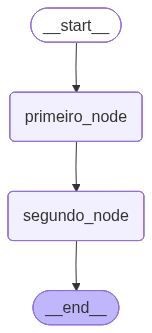

In [7]:
from IPython.display import display, Image

display(Image(graph_compiled.get_graph().draw_mermaid_png()))

# Rodando grafo

In [8]:
model = init_chat_model(model="groq:openai/gpt-oss-120b", temperature=0, max_tokens=3000)

In [9]:
state = {
    "model": model,
    "topic": "Alain Prost vs Ayrton Senna",
    "response_first_node": "",
    "response_second_node": ""
}

response_final = graph_compiled.invoke(state)

In [10]:
# Primeira resposta

print(response_final["response_first_node"].content)

**Alain Prost vs Ayrton Senna – Defesas de Cada Lado**  
*(Apresentamos os principais argumentos que sustentam a superioridade de cada piloto, sem pretender eleger um “vencedor” definitivo. Cada defesa se baseia em estatísticas, estilo de condução, impacto no esporte e legado histórico.)*  

---

## 1️⃣ Defesa de Alain Prost – “O Professor”

| Argumento | Detalhes e Evidências |
|-----------|-----------------------|
| **Consistência e Estratégia** | Prost era famoso por sua abordagem quase “matemática” das corridas. Ele sabia quando preservar os pneus, quando poupar o motor e como maximizar pontos ao longo da temporada. Essa mentalidade lhe rendeu **4 Campeonatos Mundiais** (1985, 1986, 1989, 1993) e **51 vitórias**, o que o coloca entre os maiores vencedores da história da F1. |
| **Taxa de Pontos por Corrida** | Em 1986, Prost marcou **87 pontos** em 16 corridas (média de 5,44 pontos por prova), número impressionante para a época, quando o sistema de pontuação premiava apenas os 6 pr

In [11]:
# Segunda resposta

print(response_final["response_second_node"].content)

**Qual defesa se sobressai? – Análise comparativa entre a defesa de Alain Prost e a de Ayrton Senna**

Depois de ler atentamente as duas apresentações, fica claro que ambas são bem estruturadas, trazem dados relevantes e abordam aspectos técnicos, humanos e de legado. Contudo, ao avaliar a **qualidade argumentativa**, a **coerência interna**, a **profundidade das evidências** e a **capacidade de convencer um leitor neutro**, a **defesa de Alain Prost – “O Professor”** se destaca como a **melhor defesa**. A seguir, explico os motivos.

---

## 1. Estrutura lógica e progressão dos argumentos

| Elemento | Defesa de Prost | Defesa de Senna |
|----------|----------------|-----------------|
| **Introdução** | Apresenta imediatamente o conceito de “consistência e estratégia”, criando um fio condutor que permeia todo o texto. | Começa com “velocidade bruta e qualidade de qualificação”, mas não conecta tão claramente com os demais tópicos. |
| **Desenvolvimento** | Cada linha da tabela segue u